In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime 
tf.set_random_seed(77)


In [2]:
forecastDays=7
rawArrayDatas=[["2017-08-02",
"2017-08-03",
"2017-08-04",
"2017-08-05",
"2017-08-06",
"2017-08-07",
"2017-08-08",
"2017-08-09",
"2017-08-10",
"2017-08-11",
"2017-08-12",
"2017-08-13",
"2017-08-14",
"2017-08-15",
"2017-08-16",
"2017-08-17",
"2017-08-18",
"2017-08-19",
"2017-08-20",
"2017-08-21",
"2017-08-22",
"2017-08-23",
"2017-08-24",
"2017-08-25",
"2017-08-26",
"2017-08-27",
"2017-08-28",
"2017-08-29",
"2017-08-30",
"2017-08-31",
"2017-09-01",
"2017-09-02",
"2017-09-03",
"2017-09-04",
"2017-09-05",
"2017-09-06",
"2017-09-07",
"2017-09-08",
"2017-09-09",
"2017-09-10",
"2017-09-11",
"2017-09-12",
"2017-09-13",
"2017-09-14",
"2017-09-15",
"2017-09-16",
"2017-09-17",
"2017-09-18",
"2017-09-19",
"2017-09-20",
"2017-09-21",
"2017-09-22",
"2017-09-23",
"2017-09-24",
"2017-09-25",
"2017-09-26",
"2017-09-27",
"2017-09-28",
"2017-09-29",
"2017-09-30",
"2017-10-01",
"2017-10-02",
"2017-10-03",
"2017-10-04",
"2017-10-05",
"2017-10-06",
"2017-10-07",
"2017-10-08",
"2017-10-09",
"2017-10-10",
"2017-10-11",
"2017-10-12",
"2017-10-13",
"2017-10-14",
"2017-10-15",
"2017-10-16",
"2017-10-17",
"2017-10-18",
"2017-10-19",
"2017-10-20",
"2017-10-21",
"2017-10-22",
"2017-10-23"],[34,
41,
54,
41,
35,
44,
50,
42,
42,
66,
50,
55,
56,
53,
44,
54,
54,
50,
40,
49,
28,
72,
71,
53,
43,
38,
55,
49,
43,
49,
49,
44,
39,
52,
45,
33,
43,
40,
46,
49,
50,
37,
37,
45,
48,
48,
38,
60,
31,
35,
53,
70,
62,
48,
51,
49,
38,
32,
39,
35,
30,
36,
31,
31,
44,
41,
41,
45,
46,
45,
41,
47,
48,
40,
42,
38,
38,
45,
48,
62,
46,
38,
62,
81]]

In [3]:
def minMaxNormalizer(data):
    numerator=data-np.min(data)
    denominator=np.max(data)-np.min(data)
    return numerator/(denominator+1e-7)
def minMaxDeNormalizer(data, originalData):
    shift=np.min(originalData)
    multiplier=np.max(originalData)-np.min(originalData)
    return (data+shift)*multiplier 

[[ 0.02777778  0.02777778  0.43055555  0.47222222]
 [ 0.02777778  0.04166667  0.43055555  0.56944444]
 [ 0.02777778  0.05555556  0.43055555  0.75      ]
 [ 0.02777778  0.06944444  0.43055555  0.56944444]
 [ 0.02777778  0.08333333  0.43055555  0.48611111]] -> [ 0.61111111  0.69444444  0.58333333  0.58333333  0.91666667  0.69444444
  0.76388889]
[[ 0.02777778  0.04166667  0.43055555  0.56944444]
 [ 0.02777778  0.05555556  0.43055555  0.75      ]
 [ 0.02777778  0.06944444  0.43055555  0.56944444]
 [ 0.02777778  0.08333333  0.43055555  0.48611111]
 [ 0.02777778  0.          0.44444444  0.61111111]] -> [ 0.69444444  0.58333333  0.58333333  0.91666667  0.69444444  0.76388889
  0.77777778]
[[ 0.02777778  0.05555556  0.43055555  0.75      ]
 [ 0.02777778  0.06944444  0.43055555  0.56944444]
 [ 0.02777778  0.08333333  0.43055555  0.48611111]
 [ 0.02777778  0.          0.44444444  0.61111111]
 [ 0.02777778  0.01388889  0.44444444  0.69444444]] -> [ 0.58333333  0.58333333  0.91666667  0.69444444 

[step: 0] loss: 105.85023498535156
[step: 1] loss: 101.60631561279297
[step: 2] loss: 97.79518127441406
[step: 3] loss: 94.26548767089844
[step: 4] loss: 90.87113952636719
[step: 5] loss: 87.54103088378906
[step: 6] loss: 84.23419189453125
[step: 7] loss: 80.91807556152344
[step: 8] loss: 77.562744140625
[step: 9] loss: 74.14495086669922
[step: 10] loss: 70.65010833740234
[step: 11] loss: 67.0784912109375
[step: 12] loss: 63.44300842285156
[step: 13] loss: 59.774208068847656
[step: 14] loss: 56.12092208862305
[step: 15] loss: 52.34928894042969
[step: 16] loss: 48.40460968017578
[step: 17] loss: 44.49124526977539
[step: 18] loss: 40.89198303222656
[step: 19] loss: 37.76025390625
[step: 20] loss: 34.94670867919922
[step: 21] loss: 32.00694274902344
[step: 22] loss: 28.73839569091797
[step: 23] loss: 25.232728958129883
[step: 24] loss: 21.719409942626953
[step: 25] loss: 18.401546478271484
[step: 26] loss: 15.382979393005371
[step: 27] loss: 12.695536613464355
[step: 28] loss: 10.35135459

[step: 240] loss: 3.5612549781799316
[step: 241] loss: 3.5151517391204834
[step: 242] loss: 3.5705647468566895
[step: 243] loss: 3.4742648601531982
[step: 244] loss: 3.5700173377990723
[step: 245] loss: 3.447044849395752
[step: 246] loss: 3.5488760471343994
[step: 247] loss: 3.4509432315826416
[step: 248] loss: 3.5017240047454834
[step: 249] loss: 3.4733166694641113
[step: 250] loss: 3.4558932781219482
[step: 251] loss: 3.479680299758911
[step: 252] loss: 3.433781623840332
[step: 253] loss: 3.4740262031555176
[step: 254] loss: 3.420133352279663
[step: 255] loss: 3.461965560913086
[step: 256] loss: 3.4146759510040283
[step: 257] loss: 3.444821357727051
[step: 258] loss: 3.412489414215088
[step: 259] loss: 3.4303977489471436
[step: 260] loss: 3.4059746265411377
[step: 261] loss: 3.4185614585876465
[step: 262] loss: 3.40097713470459
[step: 263] loss: 3.4106974601745605
[step: 264] loss: 3.3926661014556885
[step: 265] loss: 3.4040818214416504
[step: 266] loss: 3.3863930702209473
[step: 267

[step: 503] loss: 3.2150206565856934
[step: 504] loss: 3.2142322063446045
[step: 505] loss: 3.213468551635742
[step: 506] loss: 3.212902069091797
[step: 507] loss: 3.212348461151123
[step: 508] loss: 3.211907386779785
[step: 509] loss: 3.2109415531158447
[step: 510] loss: 3.210082530975342
[step: 511] loss: 3.2088422775268555
[step: 512] loss: 3.2077527046203613
[step: 513] loss: 3.2070670127868652
[step: 514] loss: 3.206475257873535
[step: 515] loss: 3.205622673034668
[step: 516] loss: 3.2045137882232666
[step: 517] loss: 3.203467845916748
[step: 518] loss: 3.2026495933532715
[step: 519] loss: 3.202004909515381
[step: 520] loss: 3.2017247676849365
[step: 521] loss: 3.2013511657714844
[step: 522] loss: 3.200840473175049
[step: 523] loss: 3.199831008911133
[step: 524] loss: 3.1986184120178223
[step: 525] loss: 3.197298288345337
[step: 526] loss: 3.1960606575012207
[step: 527] loss: 3.1949758529663086
[step: 528] loss: 3.194030284881592
[step: 529] loss: 3.1931533813476562
[step: 530] lo

[step: 754] loss: 3.0035207271575928
[step: 755] loss: 2.9984545707702637
[step: 756] loss: 2.9927010536193848
[step: 757] loss: 2.9908101558685303
[step: 758] loss: 2.9889845848083496
[step: 759] loss: 2.9881861209869385
[step: 760] loss: 2.9880881309509277
[step: 761] loss: 2.9880783557891846
[step: 762] loss: 2.9872119426727295
[step: 763] loss: 2.985820770263672
[step: 764] loss: 2.9844374656677246
[step: 765] loss: 2.9835169315338135
[step: 766] loss: 2.9830079078674316
[step: 767] loss: 2.982802391052246
[step: 768] loss: 2.9830305576324463
[step: 769] loss: 2.9853029251098633
[step: 770] loss: 2.9888174533843994
[step: 771] loss: 2.996095895767212
[step: 772] loss: 3.0149898529052734
[step: 773] loss: 3.0165114402770996
[step: 774] loss: 3.0419259071350098
[step: 775] loss: 3.0127265453338623
[step: 776] loss: 2.9956016540527344
[step: 777] loss: 2.9779269695281982
[step: 778] loss: 2.976116418838501
[step: 779] loss: 2.985877752304077
[step: 780] loss: 2.9937338829040527
[step:

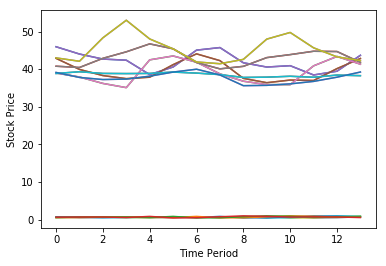

In [4]:
mockForecastDictionary={}
realForecastDictionary={}

trainSize=int(len(rawArrayDatas[0])*0.7)
testSize=len(rawArrayDatas[0])-trainSize

testY= rawArrayDatas[1][trainSize:]
ds = rawArrayDatas[0][:trainSize]
y = list((rawArrayDatas[1][:trainSize]))
sales = list(zip(ds, y))
txs = pd.DataFrame(data=sales, columns=['date', 'sales'])


year = lambda x: datetime.strptime(x, "%Y-%m-%d" ).year  
day_of_week = lambda x: datetime.strptime(x, "%Y-%m-%d" ).weekday()
month = lambda x: datetime.strptime(x, "%Y-%m-%d" ).month
# please read docs on how week numbers are calculate
week_number = lambda x: datetime.strptime(x, "%Y-%m-%d" ).strftime('%V')

txs['year'] = txs['date'].map(year)
txs['month']=txs['date'].map(month)
txs['week_number']=txs['date'].map(week_number)
txs['day_of_week']=txs['date'].map(day_of_week)

seasons = [0,0,1,1,1,2,2,2,3,3,3,0] #dec - feb is winter, then spring, summer, fall etc
season = lambda x: seasons[(datetime.strptime(x, "%Y-%m-%d" ).month-1)]
day_of_week01s=[0,0,0,0,0,1,1]
day_of_week01= lambda x: day_of_week01s[(datetime.strptime(x, "%Y-%m-%d" ).weekday())]
txs['season']=txs['date'].map(season)
txs['day_of_week01']=txs['date'].map(day_of_week01)
originalSales=list(txs['sales'])
sales=list(txs['sales'])

tempxy=[list(txs['season']),list(txs['day_of_week']),list(txs['week_number']),sales]

xy=np.array(tempxy).transpose().astype(np.float)
originalXY=np.array(tempxy).transpose().astype(np.float)
xy=minMaxNormalizer(xy)
#data_dim은 y값 도출을 위한 feature 가지수+1(독립변수 가지수 +1(y포함))
data_dim=4

#data_dim크기의 data 한 묶음이 seq_length만큼 input으로 들어가
seq_length=5

#output_dim(=forecastDays)만큼의 다음날 y_data를 예측
forecastDays=7
output_dim=forecastDays

#hidden_dim은 정말 임의로 설정
hidden_dim=10

#learning rate은 배우는 속도(너무 크지도, 작지도 않게 설정)
learning_rate=0.01

#iterations는 반복 횟수
iterations=1000


x=xy
y=xy[:,[-1]]

#build a series dataset(seq_length에 해당하는 전날 X와 다음 forecastDays에 해당하는 Y)
dataX=[]
dataY=[]
for i in range(0, len(y)-seq_length-forecastDays):
    _x=x[i:i+seq_length]
    _y=y[i+seq_length:i+seq_length+forecastDays]
    _y=np.reshape(_y,(forecastDays))
    #     _y=Y[i+seq_length:i+seq_length+forecastDays]
    print(_x,"->",_y)
    dataX.append(_x)
    dataY.append(_y)


train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:])

X=tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y=tf.placeholder(tf.float32, [None, forecastDays])

cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.nn.relu)

outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn= None) 

loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)

targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))
with tf.Session() as sess:
    #초기화
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = minMaxDeNormalizer(sess.run(Y_pred, feed_dict={X: testX}),originalXY)
#     rmse_val = sess.run(rmse, feed_dict={targets: denormalizedTestY_feed, predictions: test_predict})
#     print("RMSE: {}".format(rmse_val))
    plt.plot(test_predict)
    plt.plot(testY) #실제 sales 파란색
    plt.plot(test_predict)           #예측 sales 주황색
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()






In [5]:
testY

array([[ 0.55555555,  0.63888889,  0.68055555,  0.69444444,  0.51388889,
         0.51388889,  0.625     ],
       [ 0.63888889,  0.68055555,  0.69444444,  0.51388889,  0.51388889,
         0.625     ,  0.66666667],
       [ 0.68055555,  0.69444444,  0.51388889,  0.51388889,  0.625     ,
         0.66666667,  0.66666667],
       [ 0.69444444,  0.51388889,  0.51388889,  0.625     ,  0.66666667,
         0.66666667,  0.52777778],
       [ 0.51388889,  0.51388889,  0.625     ,  0.66666667,  0.66666667,
         0.52777778,  0.83333333],
       [ 0.51388889,  0.625     ,  0.66666667,  0.66666667,  0.52777778,
         0.83333333,  0.43055555],
       [ 0.625     ,  0.66666667,  0.66666667,  0.52777778,  0.83333333,
         0.43055555,  0.48611111],
       [ 0.66666667,  0.66666667,  0.52777778,  0.83333333,  0.43055555,
         0.48611111,  0.73611111],
       [ 0.66666667,  0.52777778,  0.83333333,  0.43055555,  0.48611111,
         0.73611111,  0.97222222],
       [ 0.52777778,  0.8333

In [8]:
list(test_predict[-1])

[43.683342, 42.836231, 41.315269, 41.802895, 42.284412, 38.266495, 39.234688]